<a href="https://colab.research.google.com/github/AndreaMayo395/Taller_2_Portafolio_Nidia_Andrea_Mayorga_Agudelo/blob/main/Taller_2_Portafolio_Nidia_Andrea_Mayorga_Agudelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [ ]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?


**Respuesta:** Usar Adj Close en un análisis financiero es más adecuado que Close porque ajusta los precios históricos para reflejar con precisión el rendimiento total de una acción, incluyendo eventos como divisiones de acciones y pagos de dividendos. Con estos se pueden comparar precios a lo largo del tiempo y calcular rendimientos reales, ya que el precio de cierre simple no considera estas distribuciones o cambios en la estructura del capital que afectan el valor para el inversor.


In [27]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones)["Close"]
datos.head() # Veo los primeros 5



/tmp/ipython-input-535232980.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones)["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2025-08-18,231.490005,204.107559,516.251282
2025-08-19,228.009995,202.309189,508.933350
2025-08-20,223.809998,200.011230,504.890015
2025-08-21,221.949997,200.440842,504.239990
2025-08-22,228.839996,206.535400,507.230011


In [ ]:
datos.tail() # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-10,230.330002,239.559998,500.369995
2025-09-11,229.949997,240.779999,501.010010
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

**Respuesta:** La acción con mayor rendimiento es la de Google (denotada cómo *GOOG*), dado que su comportamiento entre Agosto-Septiembre tien una tendencia de ascendente, es decir, de crecimiento en su función.

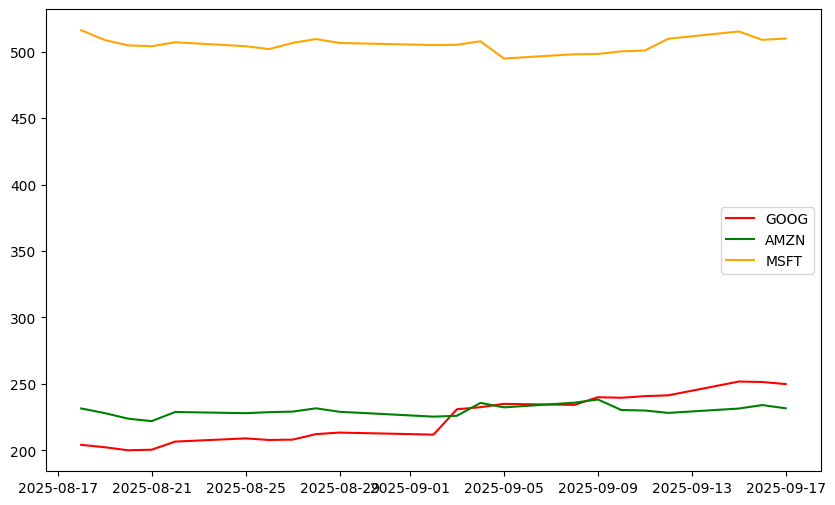

In [25]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN",color="green")
plt.plot(datos["MSFT"], label="MSFT",color="orange")
plt.legend()
plt.show()

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

**Respuesta:** la gráfica de precios refleja la "trayectoria" y el valor del crecimiento, mientras que la gráfica de rentabilidades refleja la "velocidad" y la "aceleración" de esa trayectoria, siendo más útil para analizar el riesgo y los movimientos diarios.


Ticker,AMZN,GOOG,MSFT
Date,,,
2025-08-18,NaN,NaN,NaN
2025-08-19,-0.015147,-0.008850,-0.014277
2025-08-20,-0.018592,-0.011424,-0.007976
2025-08-21,-0.008345,0.002146,-0.001288
2025-08-22,0.030571,0.029953,0.005912


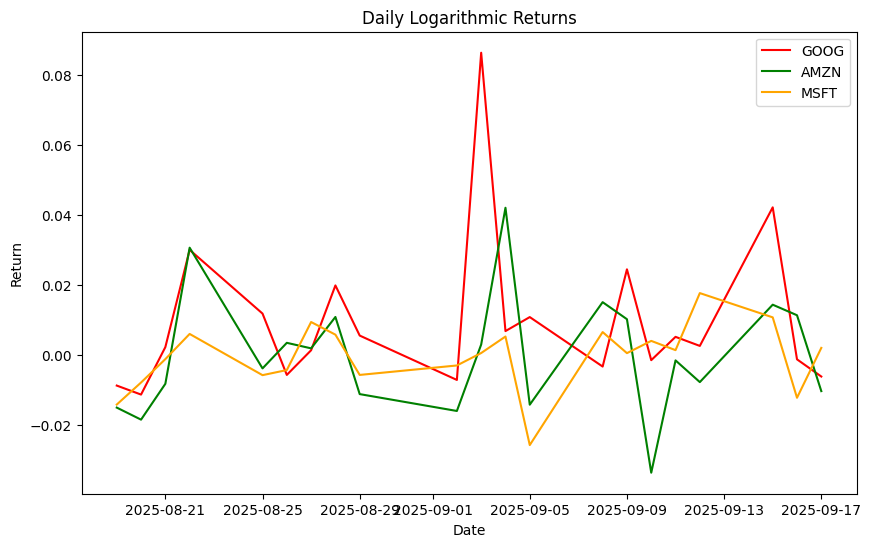

In [32]:
# COMPLETAR: calcula los rendimientos logarítmicos

rendimientos = np.log(datos / datos.shift(1))
display(rendimientos.head())

# Graficar
plt.figure(figsize=(10,6))
plt.plot(rendimientos["GOOG"], label="GOOG", color="red")
plt.plot(rendimientos["AMZN"], label="AMZN",color="green")
plt.plot(rendimientos["MSFT"], label="MSFT",color="orange")
plt.legend()
plt.title("Daily Logarithmic Returns")
plt.ylabel("Return")
plt.xlabel("Date")
plt.show()

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?



**Respuesta:** La acción más riesgosa es la que tiene la mayor volatilidad, ya que esta es una medida del riesgo (cuánto fluctúa el precio). En este caso, Google "GOOG" tiene mayor volatilidad (aproximadamente del 0.0222).
La acción que ofrece mayor retorno es la que tiene la mayor rentabilidad promedio diaria. En este caso, también es Google "GOOG" la que tiene la mayor rentabilidad promedio (aproximadamente del 0.0096).

In [33]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean()
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
display(media)
print("\nVolatilidad diaria:")
display(volatilidad)

Rentabilidad promedio diaria:


,0
Ticker,
AMZN,0.000027
GOOG,0.009629
MSFT,-0.000578



Volatilidad diaria:


,0
Ticker,
AMZN,0.017406
GOOG,0.022220
MSFT,0.009610


## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

**Respuesta:** La correlación mide la relación lineal entre dos acciones y toma valores entre -1 y 1: cuando es cercana a 1 significa que ambas tienden a moverse en la misma dirección (si una sube, la otra también lo hace), cuando es cercana a 0 indica que no hay relación lineal clara entre sus movimientos, y cuando es negativa cercana a -1 implica que se mueven en direcciones opuestas (si una sube, la otra suele bajar).

En la matriz, AMZN y GOOG tienen una correlación positiva moderada (0.59) lo que significa que, cuando Amazon sube, Google también tiende a subir, aunque no de forma perfecta, esta es la relación más fuerte del gráfico; AMZN con MSFT  tienen correlación negativa o muy débil (-0.12), lo que significa que no no se mueven de forma sincronizada, si una sube, la otra puede moverse en dirección contraria, pero muy ligeramente. Y GOOG con MSFT muestran correlaciones prácticamente nulas (-0.073), lo que refleja independencia entre sus variaciones por lo que prácticamente no guardan relación lineal entre sí.


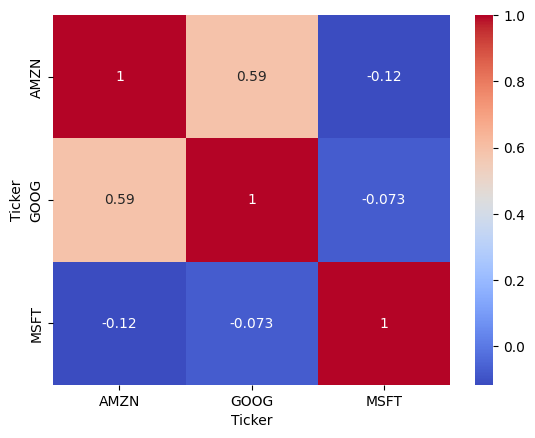

In [35]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = datos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

**Respuestas:**

1. El retorno esperado del portafolio (0.68 anualizado) representa el rendimiento promedio que se espera obtener al mantener esta combinación de activos (40% Google, 30% Amazon y 30% Microsoft) durante un año, es decir, cuánto crecería en promedio la inversión bajo las condiciones históricas de los datos analizados.  
La volatilidad del portafolio (0.1978 anualizada) mide el riesgo, o la variabilidad de los retornos, mostrando qué tan inciertos son esos resultados.


2. La diversificación hizo que el portafolio fuera menos volátil que invertir en una sola acción. Esto se da porque, al mezclar varias acciones que no siempre se mueven igual, las caídas de unas acciones pueden compensarse con las subidas de otras. Así, el riesgo total se reduce sin que necesariamente baje mucho la rentabilidad esperada.



In [36]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

retorno_portafolio = np.sum(rendimientos.mean() * pesos) * 252  # Anualizado (considerando 252 días hábiles)
covarianza = rendimientos.cov()
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos))) * np.sqrt(252) # Anualizado

print("Retorno esperado del portafolio (anualizado):", retorno_portafolio)
print("Volatilidad del portafolio (anualizada):", vol_portafolio)

Retorno esperado del portafolio (anualizado): 0.6869464231946997
Volatilidad del portafolio (anualizada): 0.1978430583027967


## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?
- ¿Qué tan correlacionadas están las acciones?
- ¿Qué aportó la diversificación al portafolio?
- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

**Análisis del Portafolio:**

Basado en el análisis de los últimos 3 años de datos de precios de cierre ajustados para Google (GOOG), Amazon (AMZN) y Microsoft (MSFT), podemos concluir lo siguiente:

**Rentabilidad y Riesgo Individual:**
La acción de **Google (GOOG)** mostró la mayor rentabilidad promedio diaria y también fue la más riesgosa, presentando la mayor volatilidad diaria. Microsoft (MSFT) tuvo la menor volatilidad, mientras que Amazon (AMZN) se ubicó en un punto intermedio en términos de riesgo y retorno.

**Correlación entre Acciones:**
Al analizar la matriz de correlación de los rendimientos diarios, observamos que **Google (GOOG) y Amazon (AMZN)** tienen una correlación positiva moderada (aproximadamente 0.59), lo que indica que tienden a moverse en la misma dirección. Las correlaciones entre MSFT y las otras dos acciones (AMZN y GOOG) son cercanas a cero o ligeramente negativas (aproximadamente -0.12 y -0.07 respectivamente), sugiriendo una baja o nula relación lineal en sus movimientos.

**Aporte de la Diversificación:**
La diversificación en este portafolio, al combinar activos con diferentes niveles de correlación (incluyendo una baja correlación con MSFT), contribuyó a **reducir la volatilidad total del portafolio** en comparación con invertir únicamente en las acciones individuales más volátiles (como GOOG o AMZN). Aunque el riesgo no se elimina por completo, la combinación de activos ayuda a suavizar los movimientos del portafolio en general.

**Decisión de Inversión (desde la perspectiva de un inversionista moderado):**
Como inversionista moderado, **probablemente consideraría invertir en este portafolio**, aunque con una evaluación cuidadosa. La justificación principal es el **alto retorno esperado** que ofrece (aproximadamente 68.7% anualizado), el cual podría considerarse que compensa el **nivel de volatilidad moderado a alto** (aproximadamente 19.8% anualizado).
Como inversionista moderado, entiendo que para obtener retornos superiores, a menudo debo asumir un mayor riesgo que un conservador. Este portafolio presenta un equilibrio que podría alinearse con los objetivos de crecimiento de mi perfil moderado, aunque siempre sería recomendable integrarlo dentro de una cartera de inversión más amplia para una gestión de riesgo global y no invertir todo el capital en este único portafolio debido a su volatilidad.